In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
ds=pd.read_csv('Historical Product Demand.csv',index_col='Date',parse_dates=True)

In [30]:
ds.head()

,Product_Code,Warehouse,Product_Category,Order_Demand
Date,,,,
2012-07-27,Product_0993,Whse_J,Category_028,100
2012-01-19,Product_0979,Whse_J,Category_028,500
2012-02-03,Product_0979,Whse_J,Category_028,500
2012-02-09,Product_0979,Whse_J,Category_028,500
2012-03-02,Product_0979,Whse_J,Category_028,500


In [31]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1048575 entries, 2012-07-27 to 2016-06-27
Data columns (total 4 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   Product_Code      1048575 non-null  object
 1   Warehouse         1048575 non-null  object
 2   Product_Category  1048575 non-null  object
 3   Order_Demand      1048575 non-null  object
dtypes: object(4)
memory usage: 40.0+ MB


In [32]:
def clean_data(ds):
    ds=ds.dropna()
    object_columns=list(ds.columns[0:3])

    PC=ds['Product_Code'].unique()
    PC_dict=dict(zip(PC,range(len(PC))))

    WH=ds['Warehouse'].unique()
    WH_dict=dict(zip(WH,range(len(WH))))

    P_CAT=ds['Product_Category'].unique()
    P_CAT_dict=dict(zip(P_CAT,range(len(P_CAT))))

    ds['Product_Code']=ds.Product_Code.map(PC_dict)
    ds['Warehouse']=ds.Warehouse.map(WH_dict)
    ds['Product_Category']=ds.Product_Category.map(P_CAT_dict)

    #ds['year']=pd.DatetimeIndex(ds['Date']).year
    #ds['month']=pd.DatetimeIndex(ds['Date']).month
    #ds['day']=pd.DatetimeIndex(ds['Date']).day
    #ds.drop('Date',inplace=True,axis=1)
    return ds

In [33]:
ds=clean_data(ds)
ds.head()

,Product_Code,Warehouse,Product_Category,Order_Demand
Date,,,,
2012-07-27,0,0,0,100
2012-01-19,1,0,0,500
2012-02-03,1,0,0,500
2012-02-09,1,0,0,500
2012-03-02,1,0,0,500


In [34]:
ds['Order_Demand'] = ds['Order_Demand'].str.replace('(',"")
ds['Order_Demand'] = ds['Order_Demand'].str.replace(')',"")
ds['Order_Demand']=ds['Order_Demand'].astype('int64')

C:\Users\aduzo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.
C:\Users\aduzo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  


In [35]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1048575 entries, 2012-07-27 to 2016-06-27
Data columns (total 4 columns):
 #   Column            Non-Null Count    Dtype
---  ------            --------------    -----
 0   Product_Code      1048575 non-null  int64
 1   Warehouse         1048575 non-null  int64
 2   Product_Category  1048575 non-null  int64
 3   Order_Demand      1048575 non-null  int64
dtypes: int64(4)
memory usage: 40.0 MB


In [8]:
import seaborn as sns

<AxesSubplot:>

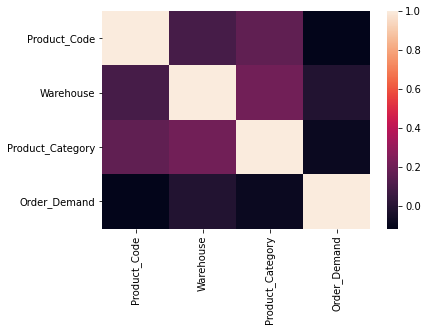

In [36]:
sns.heatmap(ds.corr())